Nama:

In [2]:
print("Nama : Hanun Masitha Ramadhani")

Nama : Hanun Masitha Ramadhani


(1) Import dataset water potability. Jadikan kolom 'potability' menjadi kolom target.

In [3]:
import pandas as pd
df_water = pd.read_csv('water_potability.csv')
df_water

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


(2) Periksa adanya missing value pada dataset, dan lakukan dropna apabila sedikit jumlahnya.

In [4]:
missing = []
persen = []

for i in df_water.columns:
    missing.append(df_water[i].isnull().sum())
    persen.append(df_water[i].isnull().sum()/len(df_water[i])*100)

proporsi_hilang = pd.DataFrame({
        'kolom' : df_water.columns,
        'missing' : missing,
        'persen_missing' : persen
})
    
proporsi_hilang

,kolom,missing,persen_missing
0,ph,491,14.987790
1,Hardness,0,0.000000
2,Solids,0,0.000000
3,Chloramines,0,0.000000
4,Sulfate,781,23.840049
5,Conductivity,0,0.000000
6,Organic_carbon,0,0.000000
7,Trihalomethanes,162,4.945055
8,Turbidity,0,0.000000
9,Potability,0,0.000000


imputation on PH


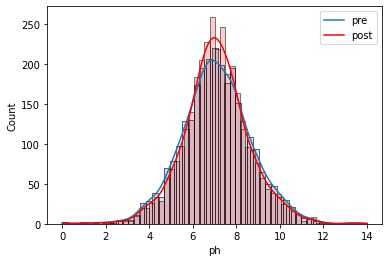

pre: mean: 7.080794504276835, std: 1.5940332597032338
post: mean: 7.078166598850777, std: 1.496999687091083
imputation on Sulfate


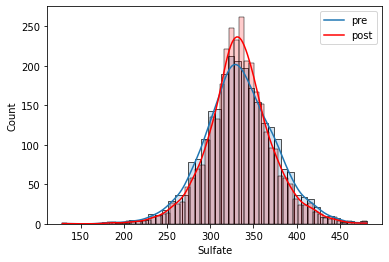

pre: mean: 333.7757766108135, std: 41.408539661817485
post: mean: 333.6057666274236, std: 37.447338478064815


In [5]:
from sklearn.impute import KNNImputer
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

imputer_knn = KNNImputer(n_neighbors=5)
imputer_result = imputer_knn.fit_transform(df_water)

imputer_result = pd.DataFrame(imputer_result)
imputer_result.columns = df_water.columns

print("imputation on PH")

sns.histplot(df_water['ph'], alpha=0.2, kde=True)
sns.histplot(imputer_result['ph'], alpha=0.2, kde=True, color='red')
plt.legend(['pre', 'post'])
plt.show()
print('pre: mean: {}, std: {}'.format(np.mean(df_water['ph']), 
                                      np.std(df_water['ph'])))
print('post: mean: {}, std: {}'.format(np.mean(imputer_result['ph']), 
                                      np.std(imputer_result['ph'])))

print("imputation on Sulfate")

sns.histplot(df_water['Sulfate'], alpha=0.2, kde=True)
sns.histplot(imputer_result['Sulfate'], alpha=0.2, kde=True, color='red')
plt.legend(['pre', 'post'])
plt.show()
print('pre: mean: {}, std: {}'.format(np.mean(df_water['Sulfate']), 
                                      np.std(df_water['Sulfate'])))
print('post: mean: {}, std: {}'.format(np.mean(imputer_result['Sulfate']), 
                                      np.std(imputer_result['Sulfate'])))

In [6]:
df_water['ph'] = imputer_result['ph']
df_water['Sulfate'] = imputer_result['Sulfate']

df_water = df_water.dropna()

<AxesSubplot:>

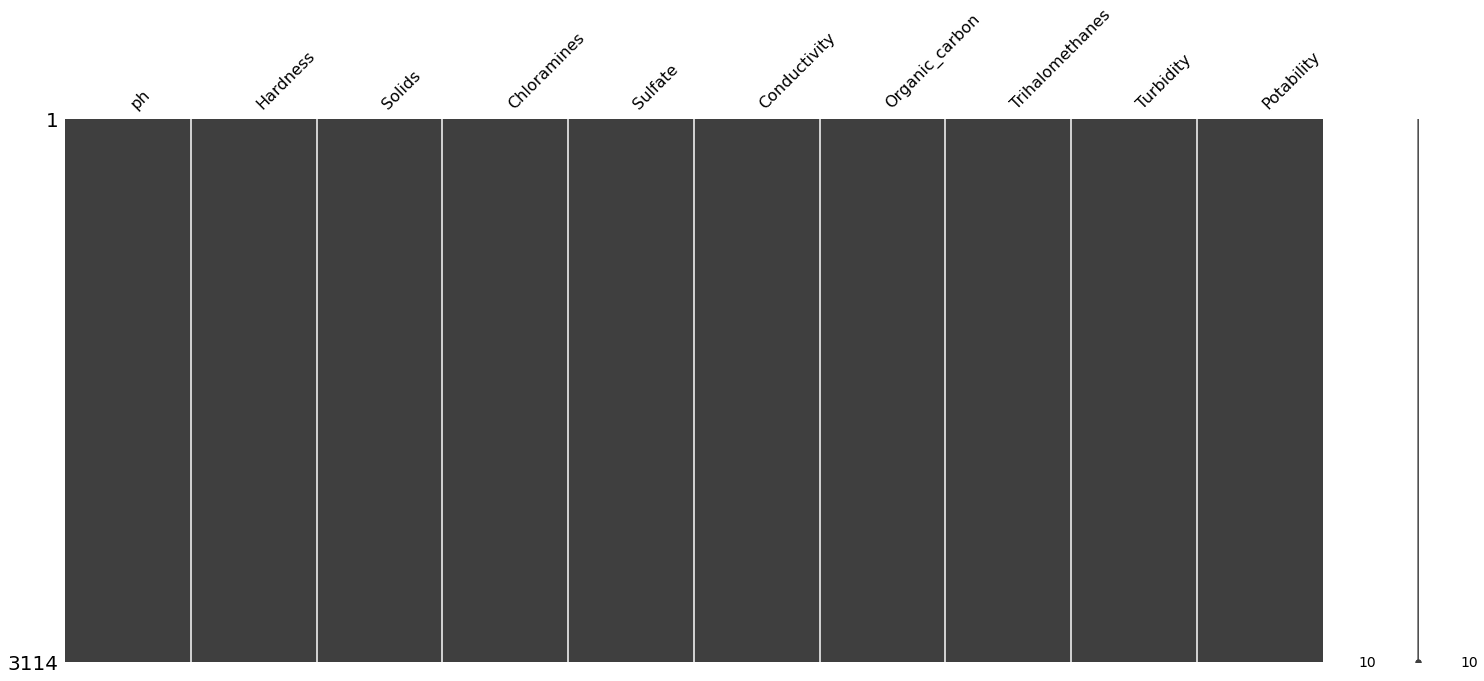

In [7]:
import missingno as msno

msno.matrix(df_water) 

In [8]:
y = df_water['Potability']
x = df_water.drop(['Potability'], axis = 1)

c:\users\hanun\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    1891
1    1223
Name: Potability, dtype: int64


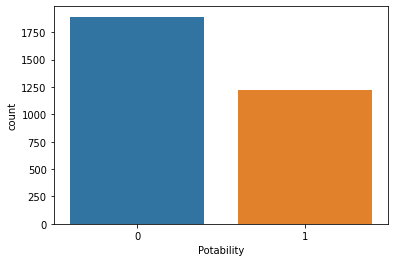

In [9]:
import seaborn as sns

sns.countplot(y)
print(y.value_counts())

(3) Lakukan train test split, test:test = 4:1, stratify = y.

In [10]:
# Data Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2
)

print("Jumlah Data Train : {0}".format(len(X_train)))
print("Jumlah Data Test : {0}".format(len(X_test)))

Jumlah Data Train : 2491
Jumlah Data Test : 623


(4) Lakukan transformasi pada X_train apabila diperlukan (imputation/scaling/onehotencoding/selection). Lakukan transformasi serupa pada X_test tanpa melakukan fitting kembali.

Data Training

In [11]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
X_train_scaled = minmax_scaler.fit_transform(X_train)

X_train_scaled = pd.DataFrame(X_train_scaled)
X_train_scaled.columns = X_train.columns
X_train_scaled

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0.424424,0.715796,0.237366,0.472695,0.587438,0.587668,0.526126,0.533931,0.573820
1,0.689904,0.679049,0.327533,0.524362,0.696478,0.675517,0.512920,0.446999,0.642681
2,0.526191,0.653418,0.249995,0.587037,0.667856,0.370319,0.496612,0.519173,0.388454
3,0.568499,0.391965,0.382635,0.719040,0.372070,0.255553,0.533223,0.868200,0.654652
4,0.499272,0.598389,0.335739,0.626929,0.507124,0.253738,0.386446,0.503242,0.677232
...,...,...,...,...,...,...,...,...,...
2486,0.670992,0.730702,0.210640,0.533432,0.526135,0.327617,0.467333,0.405943,0.317822
2487,0.513212,0.515343,0.409046,0.380797,0.439577,0.354157,0.391860,0.181715,0.443787
2488,0.583870,0.695308,0.505595,0.342459,0.444086,0.414675,0.485580,0.452095,0.656979
2489,0.467110,0.575231,0.470540,0.521594,0.520794,0.427727,0.603448,0.440086,0.527715


Data Testing

In [15]:
x_test_scaled = minmax_scaler.transform(X_test)

x_test_scaled = pd.DataFrame(x_test_scaled)
x_test_scaled.columns = X_test.columns
x_test_scaled

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0.448885,0.605428,0.298907,0.675403,0.756359,0.586975,0.523717,0.443335,0.722593
1,0.570761,0.557894,0.437244,0.560374,0.588388,0.798303,0.449916,0.556996,0.340765
2,0.481958,0.721031,0.397640,0.160155,0.651165,0.276049,0.504111,0.480706,0.384983
3,0.419330,0.453224,0.305205,0.637357,0.567415,0.429649,0.425288,0.417196,0.456728
4,0.418559,0.877594,0.054507,0.291243,0.746234,0.464517,0.159509,0.392800,0.395027
...,...,...,...,...,...,...,...,...,...
618,0.652198,0.789088,0.157755,0.443050,0.633903,0.631840,0.336177,0.527693,0.669648
619,0.632437,0.606580,0.310935,0.418322,0.757686,0.499432,0.316246,0.592567,0.402116
620,0.569779,0.655831,0.246935,0.421450,0.704990,0.755693,0.459436,0.390858,0.666006
621,0.351507,0.353683,0.226670,0.473958,0.649989,0.273300,0.729421,0.527060,0.366142


(5) Lakukan cross-validation dengan estimator SVC dengan kernel 'rbf' dengan untuk menentukan nilai optimal untuk hyperparameter 'gamma' dan 'c'. Print classification report untuk trainset dan testset (default vs optimized). Apakah optimisasi meningkatkan performansi dari model?

In [22]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'gamma':['scale', 'auto'],
             'C':[10, 1, 0.1],
             'kernel': ['rbf']}

svm_rbf = GridSearchCV(SVC(), param_grid, cv=5)

svm_rbf.fit(X_train_scaled, y_train)
best_param = svm_rbf.best_params_

In [23]:
best_param

{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}

In [26]:
rbf = SVC(kernel='rbf')
rbf_opt = SVC(**best_param)

rbf.fit(X_train_scaled, y_train)
rbf_opt.fit(X_train_scaled, y_train)

y_pred_test_def_rbf = rbf.predict(x_test_scaled)
y_pred_test_opt_rbf = rbf_opt.predict(x_test_scaled)

#X_test_sm, y_test_sm

In [27]:
from sklearn.metrics import classification_report

print('Result of Testing Datast with optimized parameter')
print(classification_report(y_test, y_pred_test_opt_rbf, labels=[1,0]))

Result of Testing Datast with optimized parameter
              precision    recall  f1-score   support

           1       0.68      0.23      0.34       247
           0       0.65      0.93      0.76       376

    accuracy                           0.65       623
   macro avg       0.66      0.58      0.55       623
weighted avg       0.66      0.65      0.60       623



In [28]:
print('Result of Testing Datast without optimized parameter')
print(classification_report(y_test, y_pred_test_def_rbf, labels=[1,0]))

Result of Testing Datast without optimized parameter
              precision    recall  f1-score   support

           1       0.68      0.23      0.34       247
           0       0.65      0.93      0.76       376

    accuracy                           0.65       623
   macro avg       0.66      0.58      0.55       623
weighted avg       0.66      0.65      0.60       623



(6) Lakukan cross-validation dengan estimator SVC dengan kernel 'poly' dengan untuk menentukan nilai optimal untuk hyperparameter 'coef0' dan 'd'. Print classification report untuk trainset dan testset (default vs optimized). Apakah optimisasi meningkatkan performansi dari model?

In [ ]:
param_grid = {'degree':[2, 3, 4, 5],
             'coef0':[10, 1, 0.1],
             'kernel': ['poly']}

svm_poly = GridSearchCV(SVC(), param_grid, cv=5)

svm_poly.fit(X_train_scaled, y_train)
best_param = svm_poly.best_params_

In [ ]:
best_param

In [ ]:
poly = SVC(kernel='poly')
poly_opt = SVC(**best_param)

poly.fit(X_train_scaled, y_train)
poly_opt.fit(X_train_scaled, y_train)

y_pred_test_def_poly = poly.predict(x_test_scaled)
y_pred_test_opt_poly = poly_opt.predict(x_test_scaled)

#X_test_sm, y_test_sm

In [ ]:
from sklearn.metrics import classification_report

print('Result of Testing Datast with optimized parameter')
print(classification_report(y_test, y_pred_test_opt_poly, labels=[1,0]))

In [ ]:
print('Result of Testing Datast without optimized parameter')
print(classification_report(y_test, y_pred_test_def_poly, labels=[1,0]))

(7) Dari hasil performansi yang Anda dapatkan dengan menggunakan kedua kernel, manakah estimator yang lebih baik untuk memprediksi dataset ini?

Hasil dari SVM menggunakan rbf dapat dikatakan belum maksimal, seperti juga menggunakan poly. pada saat menggunakan kernel poly juga terdapat kendala yaitu running yang terus menerus. waktu komputasi pada saat menggunakan poly juga sangat lama dari pada menggunakan rbf. untuk alasan kenapa menggunakan poly lebih berat dari pada rbf, saya masih belum menemukan